## Projekt Indywidualny

Autor: <b>Daniel Ślusarczyk</b>

Opiekun projektu: <b>mgr inż. Mateusz Bartosiewicz<b>

## Spis Treści:
1. [Cel projektu](#CP)
2. [NLP](#NLP)
3. [Potrzebne instalacje](#PI)
4. [Metryki](#M)
    1. [BLEU](#BLEU)
        1. [Opis](#BLEU_O)
        2. [Działanie](#BLEU_D)
        3. [Problemy](#BLEU_P)
    2. [METOR](#METEOR)
        1. [Opis](#METEOR_O)
        2. [Działanie](#METEOR_D)
        2. [Problemy](#METEOR_P)
    3. [ROUGE](#ROUGE)
        1. [Opis](#ROUGE_O)
        2. [ROUGE-N](#ROUGE_N)
            1. [Działanie](#ROUGE_N_D)
        3. [ROUGE-L](#ROUGE_L)
            1. [Działanie](#ROUGE_L_D)
        3. [Problemy](#ROUGE_P)
    4. [WMD](#WMD)
        1. [Opis](#WMD_O)
        2. [Działanie](#WMD_D)
        3. [Problemy](#WMD_P)
    5. [CIDEr](#CIDER)
        1. [Opis](#CIDER_O)
        2. [Działanie](#CIDER_D)
        3. [CIDEr-D](#CIDER_D_D)
    6. [SPICE](#SPICE)
        1. [Opis](#SPICE_O)
        2. [Działanie](#SPICE_D)
        3. [Problemy](#SPICE_P)        
5. [Sposoby porównywania tesktów](#SPT)
6. [Embeddings dla NLP](#EDN)
7. [Zbiór COCO](#ZC)
8. [Serwer ewauacyjny COCO](#SEC)
9. [Źródła](#SOURCE)
<br>
<br>
<br>

<a name="CP"></a>
### Cel projektu
<p style='text-align: justify;'>
Celem projektu jest opracowanie teoretyczne narzędzi do analizy NLP. Projekt zakłada prezentację działania poszczególnych metryk i zagadnień związanych z ewaluacją napisów. Poruszanym aspektem są również opracowane narzędzia do ewaluacji i sposoby ich używania.
</p>

### Potrzebne instalacje
<a name="PI"></a>
<p style='text-align: justify;'>
W celu wizualizacji sposobu działania niektórych metryk niezbędna jest instalacja dodatkowych pakietów, które nie są dostępne w standardowym języku Pythonie. Niezainstalowanie tych pakietów wiąże się z niewłaściwym działaniem kodu znajdującego się w poniższych punktach.
</p>

Niezbędne instalacje:
* Metryka ROUGE - Python rouge library

In [ ]:
# Pakiety do liczenia wzorcowego ROUGE
import sys
!{sys.executable} -m pip install rouge

* Metryka WMD - NTLK

In [4]:
# Pakiety do usuwania "przerywników"
from nltk.corpus import stopwords
from nltk import download
download('stopwords')

[nltk_data] Downloading package stopwords to /home/dan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

* Metryka WMD - PyEMD [Linux]

In [11]:
# Pakiet potrzebny do liczenia metryki WMD
import sys
!{sys.executable} -m pip install pyemd

* Wartości Shapleya - SHAP

In [1]:
# Pakiet do analizowania wartości Shapleya
import sys
!{sys.executable} -m pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


* Coco-Caption [Linux]

In [1]:
from funkcje.coco import *
cc = prepareCoco()

loading annotations into memory...
0:00:00.862144
creating index...
index created!
Loading and preparing results...     
DONE (t=0.02s)
creating index...
index created!
tokenization...


PTBTokenizer tokenized 61268 tokens at 142691.60 tokens per second.
PTBTokenizer tokenized 10892 tokens at 76184.24 tokens per second.


setting up scorers...
computing Bleu score...
{'testlen': 9893, 'reflen': 9855, 'guess': [9893, 8893, 7893, 6893], 'correct': [5732, 2510, 1043, 423]}
ratio:1.003856
Bleu_1: 0.579
Bleu_2: 0.404
Bleu_3: 0.279
Bleu_4: 0.191
computing METEOR score...
METEOR: 0.195
computing Rouge score...
ROUGE_L: 0.396
computing CIDEr score...
CIDEr: 0.600
computing SPICE score...


Parsing reference captions
Parsing test captions


SPICE evaluation took: 3.997 s
SPICE: 0.133


* Java 1.8
* Python 3.8
<br> <br>
<b>Zalecany system: Ubuntu 20.04</b>

<a id ="NLP"></a>
### NLP - Przetwarzanie Języka Naturalnego

<p style='text-align: justify;'>
NLP (z ang. Natural Leanguage Processing) jest to interdyscyplinarna dziedzina, oparta na podstawach sztucznej inteligencji i językoznawstwa.
Zajmuje się automatyzacją analizy, rozumienia, tłumaczenia i generowania języka naturalnego przez komputer.  Istnieją dwa fundamentalne kierunki przepływu informacji w NLP, które stanowią główną problematykę tej dziedziny . System, który zawiera informacje zapisane w bazie danych w sposób techniczny i zrozumiały wyłącznie dla osób zaznajomionych ze sposobem zapisu przekształca się w informacje przedstawione w sposób zrozumiały dla wszystkich osób posługujących się danym językiem. Z drugiej strony system, który rozumie język naturalny modyfikuje go na formalne symbole możliwe do przetworzenia przez system komputerowy. W konsekwencji problematyka NLP dotyczy zarówno generacji i rozumienia języka.
</p>
<br>
<b>Problemy stojące przed NLP</b> 
<br>
Ze względu na niezwykłe rozbudowanie i skomplikowanie języka naturalnego można wyróżnić wiele problemów, z którymi wiąże się dziedzina NLP:

* Segmentacja sygnału mowy - stwierdzenie występowania w sygnale mowy przerwy pomiędzy kolejnymi znakami jest skomplikowanym zadaniem ze względu na wpływ szybkości mowy, semantyki i gramatyki charakterystycznej dla danego języka.
* Segmentacja tekstu - istnieją języki, w których nie istnieją wyraźne granice pomiędzy wyrazami.
* Wieloznaczność słów - znaczenie danego słowa może wymagać rozpatrywania go w kontekście większej ilości słów. Zadaniem NLP jest określenie takiego znaczenia.
* Syntaktyczna niejednoznaczność - analiza języka naturalnego może prowadzić do gramatycznej dwuznaczności. NLP odpowiada za rozpatrzenie danego fragmentu w kontekście i stwierdzenie poprawnej wersji.
* Nieprawidłowe i nieregularne dane - wykrywanie literówek i niepoprawnej składni w tekście pisanym lub błednej wymowy, regionalizmów, akcentów w sygnale mowy.
* Akt mowy i plan - analiza sytuacji, w której występuje związek pomiędzy czynnością, a mową.

<b> Przykładowe zadania NLP</b>
* Automatyczna sumaryzacja – program umożliwiający streszczenie dłuższego tekstu w krótszy o tym samym przesłaniu i najważniejszych informacjach
* Synteza mowy – operacja polegająca na przetwarzaniu języka na mowę
* Korekcja tekstu – analiza tekstu i wykrywanie błędów
* Rozpoznawanie mowy – operacja polegająca na przetwarzaniu mowy na tekst

## Metryki 
<a class="anchor" id ="M"></a>

<p style='text-align: justify;'>
Wzmożony rozwój NLP skutkuje zwiększoną potrzebą oceny jakosci powstających systemów automatycznego przetwarzania języka naturalnego. Metryki są nieodłączonym elementem uczenia maszynowego. Służą do oceny spełnienia oczekiwań stawianych przed rozwiązaniem problememu, do którego używany jest ewaluowany system.
</p>

### BLEU
<a class="anchor" id ="BLEU"></a>

<b><font color='red'>B</font>i<font color='red'>L</font>ingual <font color='red'>E</font>valuation <font color='red'>U</font>nderstudy</b>
<a class="anchor" id ="BLEU_O"></a>
<br>
<p style='text-align: justify;'>
Ewaluacja służąca do mierzenia jakości modeli tłumaczenia maszynowego kierująca się zasadą "im bliższe tłumaczenie automatyczne i profesjonalne ludzkie tłumaczenie, tym lepiej". Zadaniem tej metryki jest ocena jak dobrze model tłumaczy tekst pomiędzy językami. W przypadku tej metryki "jakość" rozumiana jest jako korelacja pomiędzy danymi wyjściowymi a tekstem ludzkim. Został przedstawiony w 2002 roku i opisany w raporcie firmy IBM. BLEU jest jedną z pierwszych metryk, której udało się uzyskać wyniki zbliżone z ludzkim osądem. W konsekwencji stała się najbardziej popularną metodą, pomimo pewnych wad.
</p>

<b>Działanie</b><br>
<a id ="BLEU_D"></a>
<p style='text-align: justify;'>
Działanie metryki zostanie przedstawione na podstawie kodu, który krok po kroku przeprowadza potrzebne operacje w celu obliczenia wartości metryki. Prezentowany kod ma charakter prezentacyjny i wizualizuje wiele informacji w celu łatwiejszego zrozumienia działania metryki. Wynik uzyskany przez kod jest możliwy do porównania ze wzorcowym wynikiem.
</p>

Analizowane dane: <br>
<p style='text-align: justify;'>
Metryka BLEU opiera działanie na porównywaniu n-gramów tłumaczenia kandydata z n-gramami tłumaczeń wzorcowych (miejsce wystąpienia analizowanego n-gramu w tłumaczeniu kandydatującym i wzorcu nie ma znaczenia). Im większa liczba wspólnych n-gramów pomiędzy kandydatem i wzorcem tym tłumaczenie jest uznawane za lepsze. Metryka BLEU pozwala na dostosowanie wag poszczególnych n-gramów i przypisanie większej wartości n-gramom, które powinny być szczególnie uwzględniane. Wartość listy <b>weights</b> służy do podania wag dla poszczególnych n-gramów. Podanie wartości 0 jest jednoznaczne z wyzerowaniem wpływu danego n-gramu na wynik końcowy. Niepodanie żadnej wartości pozwala całkowicie wykluczyć ostatnie n-gramy z analizy. Lista <b>references</b> służy do podania wzorcowych tłumaczeń dla danego tłumaczenia kandydującego <b>candidate</b>. Sposób prawidłowego wpisania tych danych jest przedstawiony poniżej.<br>
</p>
Przykłady: <br>

* weights = (0.25) - uwzględnienie w obliczeniach jedynie unigramów <br>
* weights = (0, 0, 0.25) - uwzględnienie w wyniku jedynie trigramów. Przeprowadzenie analizy dla unigramów, bigramów i trigramów <br>
* weights = (0.2, 0.3, 0.4, 0.5) - uwzględnienie w obliczeniach od unigramu do 4-gramu z przypisaniem kolejno wag: 0.2, 0.3, 0.4, 0.5 <br>
* references = ['Recepcjonista poinformował o zamknięciu hotelu', 'Pracownik recepcji poinformował o zamknięciu hotelu'] - zdefiniowanie dwóch tłumaczeń wzorcowych dla tłumaczenia kandydującego <br>
* references = ['Recepcjonista poinformował o zamknięciu hotelu'] - zdefiniowanie jednego tłumaczenia wzorcowego dla tłumaczenia kandydującego <br>
* candidate = 'Pan pracujący na recepecji udzielił informacji o zamknięciu hotelu' - zdefiniowanie ocenianego tłumaczenia (kandydata) 

**Przykład danych 1** 
<p style='text-align: justify;'>
Przykład danych, w których zdanie kandydujące i referencyjne jest takie same. Jest to sytuacja idealna, więc oczekiwana wartość metryki to 1.
</p>

In [20]:
from funkcje.Bleu import *
# Wagi przypisane do poszczególnych n-gramów:
weights = [0.25, 0.25, 0.25, 0.25]

# Tłumaczenia referencyjne
references = [
            'It is a guide to action which ensures that the miliatry always obeys the commands of the party'
             ]

# Tłumaczenie kandydujące
candidate = 'It is a guide to action which ensures that the miliatry always obeys the commands of the party'

bleu = Bleu(weights, references, candidate)

**Przykład danych 2**
<p style='text-align: justify;'>
Przykład danych, w których kandydat jest bardzo podobny do zdań referencyjnych, ale zawiera słowa, które nie występują w referencjach. Wartość metryki powinna być dość wysoka.
</p>

In [7]:
from funkcje.Bleu import *
# Wagi przypisane do poszczególnych n-gramów:
weights = [0.25, 0.25, 0.25, 0.25]

# Tłumaczenia referencyjne
references = [
            'Głowa Stanów Zjadnoczonych ogłosiła zniesienie polityki wizowej dla swojego kraju',
            'Zniesienie polityki wizowej dla swojego kraju zostało ogłoszone przez Obamę',
            'Prezydent Stanów Zjednoczonych ogłosił zniesienie polityki wizowej dla swojej ojczyzny'
             ]

# Tłumaczenie kandydujące
candidate = 'Prezydent Stanów Zjednoczonych ogłosił zniesienie polityki wizowej w granicach swojego kraju'

bleu = Bleu(weights, references, candidate)

**Przykład danych 3**
<p style='text-align: justify;'>
Przykład danych podatnych na występowanie synonimów, zdrobnień i dwuznaczności. Wartość metryki powinna być niska, co odbiega od ludzkiego osądu. </p>

In [1]:
from funkcje.Bleu import *
# Wagi przypisane do poszczególnych n-gramów:
weights = [0.25]

# Tłumaczenia referencyjne
references = [
            'Jan wrócił do kraju, z którego pochodził na złość'
             ]

# Tłumaczenie kandydujące
candidate = 'Janek na przekór powrócił do ojczyzny'

bleu = Bleu(weights, references, candidate)

Potwierdzenie danych: <br>
Wykonanie poniższego kodu pozwala na potwierdzenie poprawności wprowadzonych danych. 

In [2]:
bleu.showAnalizedData()

Liczba rozpatrywanych n-gramów:                   1
Liczba tłumaczeń referencyjnych (wzorcowych):     1
Maksymalna długość wzorca:                        9
Maksymalna długość kandydata:                     6
Tłumaczenie kandydujące:                          ['Janek', 'ty', 'przekór', 'powrócił', 'bo', 'ojczyzny']
Tłumaczenie kandydujące bez powtórzeń:            ['Janek', 'ty', 'przekór', 'powrócił', 'bo', 'ojczyzny']




Wizuliacja BLEU: <br>
<p style='text-align: justify;'>
Obliczenie końcowej wartości metryki wymaga przeanalizowania podanej liczby n-gramów. Poszczególne, analizowane n-gramy utworzone z tłumaczenia ocenianego zawiera pierwsza kolumna tabeli oznaczona jako <b>n-GRAM</b> (warto zauważyć, że ilość unigramów może być mniejsza od bigramów, ponieważ ewaluowane tłumaczenie może zawierać powtarzające się słowa). Każdy n-gram jest wyszukiwany w tłumaczeniach referencyjnych. Kolumna <b>Ref</b> z numerem tłumaczenia zawiera informacje ile razy dany n-gram wystąpił w tym tłumaczeniu. Następująca kolumna <b>Max Ref</b> jest maksymalną liczbą wystąpień wśród wszystkich tłumaczeniach wzorcowych. Kolumna <b>Count</b> zawiera informacje o ilości wystąpień n-gramu w tłumaczeniu ocenianym, a kolumna <b>Clip Count</b> przechowuje minimalną wartość z Count i Max Ref. Najwiażniejsza kolumna <b>Contribution</b> wskazuje "wkład" danej grupy n-gramów do wyniku końcowego. Jest to stosunek sumy kolumny Clip Count do liczebności danej grupy n-gramów (uwzględniając powtórzenia). Wprowadzony mechanizm obliczania wartości w kolumnie Clip Count jest zmodyfikowaną precyzją n-gramu i pozwala na uniknięcie sytuacji, w której tłumaczenie otrzymuje nienaturalnie dużą wartość metryki poprzez podanie w tłumaczeniu kandydującym powtarzającego się słowa z tłumaczenia referencyjnego. 
<br>
Przykładowo dla tłumaczeń wzorcowych: "the cat is on the mat" i "there is a cat on the mat" oraz tłumaczenia ocenianego "the the the the the the the" wkład unigramu "the" wynosi 2/7 zamiast 7/7.
</p>

In [3]:
bleu.showTable()

Lp   n-GRAM                                            Ref1      Max Ref   Count     Clip Count        Contribution
1)   Janek                                             0         0         1         0                          0/6
2)   ty                                                0         0         1         0                             
3)   przekór                                           0         0         1         0                             
4)   powrócił                                          0         0         1         0                             
5)   bo                                                0         0         1         0                             
6)   ojczyzny                                          0         0         1         0                             




Obliczenie kary za różnice długości: <br>
<p style='text-align: justify;'>
Metryka BLEU uwzględnia również różnice w długościach pomiędzy tłumaczeniem ocenianym, a referencyjnymi. Jest to przeprowadzane poprzez mnożenie metryki przez wartość <b>BP</b> (z ang. Brevity Penalty) liczoną zgodnie ze wzorem: <br>
</p>
Dla c > r lub c = r:
$$
  BP = 1 
$$
Dla c < r:
$$
  BP = e^{1-\frac{r}{c}}
$$
$r$ - liczba słów w wzorcowym tłumaczeniu<br>
$c$ - liczba słów w kandydowanym tłumaczeniu<br>
Otrzymana kara jest z przedziału 0 i 1.

In [4]:
bleu.showBP()

Maksymalna długość tłumaczenia wzorcowego: 9
Długość tłumaczenia kandydującego: 6
BP: 0.6065306597126334



Ostateczy wynik: <br>
Końcowa wartość metryki jest liczona zgodnie ze wzorem:
$$
  BLUE = BP * exp \Biggl ( \sum \limits_{n=1} ^{N} w_{n} log (p_{n}) \Biggr )
$$
$N$ - liczba rozważanym n-gramów (otrzymana na podstawie zadeklarowanych wag w liście "weights")<br>
$w_{n}$ - waga danego n-gramu (podana w liście "weights")<br>
$p_{n}$ - stosunek wystąpień danego n-gramu do wszystkich n-gramów (wartość odczytana z kolumny "Contribution" dla danego n-gramu)<br>
Końcowa wartość metryki powinna być z przedziału 0 i 1.

In [5]:
bleu.showResult()

BLUE [1] = 0.607 exp( 0.25 ln( 0/6 ) ) = 0


Obliczenie wzorcowego BLEU: <br>
Wartość metryki BLEU otrzymana przez gotowy pakiet.

In [6]:
# Wzorcowa wartość BLEU:
import nltk.translate.bleu_score as BLEU
candidate = candidate.split()
references = [ref.split() for ref in references]

print("Wzorcowe BLEU Score: ", BLEU.sentence_bleu(references, candidate, weights))

Wzorcowe BLEU Score:  0


<b>Problemy metryki BLEU</b> <br>
<a class="anchor" id ="BLEU_P"></a>
Wiele badań potwierdziło korelację wartości metryki BLEU oceną ludzką. Zauważa się jednak pewne problemy tej metryki:
* Punkty dla słów posiadają taką samą wagę, więc zdania niekompletne nie są w żaden sposób niżej oceniane
* Synonimy i parafrazy są brane pod uwagę wyłącznie wtedy, gdy występują w zbiorze tłumaczeń referencyjnych
* Tłumaczenia otrzymujące podobne wartości metryki mogą uzyskać skrajne wartości w ocenie ludzkiej ze wględu na możliwości oszukania metryki (szczególnie wczesnych wersji metryki BLEU)
* Nie jest rozważana waga danych słów. W takim samym stopniu na wynik końcowy wpływa wystąpienie przyimków, jak zwrotów szczególnie ważnych dla tłumaczenia.
* W przypadku oparcia metryki BLEU na unigramach kolejność słów nie ma żadnego znaczenia.

<b>Zastosowanie BLEU dla języka polskiego</b> <br>
<p style='text-align: justify;'>
Metryka BLEU jest niezależna od języka, który analizuje, co stanowi jej ogromną przewagę nad innymi metrykami. Warunkiem koniecznym w przypadku języka polskiego jest jedynie prawidłowe kodowanie polskich znaków.
</p>

In [6]:
from funkcje.Bleu import *
weights = [1]

# Tłumaczenia referencyjne
references = [
            'W miejscowości Szczebrzeszyn chrząszcz wydaje dźwięki w trzcinie',
            'Chrząsz wydaje dźwięki w trzcinie w Szczebrzeszynie'
             ]

# Tłumaczenie kandydujące
candidate = 'W Szczebrzeszynie chrząszcz brzmi w trzcinie'

Bleu(weights, references, candidate).showResult()

BLUE [1] = 0.846 exp( 1 ln( 5/6 ) ) = 0.7054014374088451


### METEOR
<a id ="METEOR_O"></a>

**<font color='red'>M</font>etric for <font color='red'>E</font>valuation of <font color='red'>T</font>ranslation with <font color='red'>E</font>xplicit <font color='red'>OR</font>dering**

<p style='text-align: justify;'>
METEOR to metryka używana do oceny tłumaczenia maszynowego. Została opracowana i wydana w 2004 roku z przeznaczeniem osiągnięcia wysokiej korelacji z ludzkim osądem. Oparta jest na średniej harmonicznej n-gramów precyzji i pokrycia z przyznaniem większej wagi dla pokrycia. Cechą charakterystyczną tej metryki jest dopasowywanie synonimów - akceptowanie wyrazów o podobnym znaczeniu. Powodem powstania tej metryki jest próba wyeliminowania błędów pojawiających się w metryce BLEU. Główna różnicą pomiędzy tymi metrykami jest poziom szukania korelacji. BLUE skupia się na poziomie całego korpusu, natomiast METEOR na poziomie zdań i segmentów.
<\p>
<br><br>
    
<b>Działanie </b> 
<br>
<a id ="METEOR_D"></a>
<p style='text-align: justify;'>
METEOR w celu oszacowania jakości tłumaczenia maszynowego porównuje je z jednym/dwoma tłumaczeniami wzorcowymi. Wynik ewaluacji jest obliczany osobno dla każdego zdania w taki sposób, że każde zdanie z tłumaczenia maszynowego jest porównywane ze zdaniem z tłumaczenia wzorcowego, a następnie do dalszej analizy brana jest pod uwagę lepsza ocena. 
<\p>
Metryka METEOR posługuje się dwoma etapami:

* Etap pierwszy: 
    <br> 
METEOR ALIGNER - tworzenie odwzorowania pomiędzymi tłumaczeniami
* Etap drugi: 
    <br>
METEOR SCORER - obliczanie końcowego wyniku

<p style='text-align: justify;'>    
Etap pierwszy:<br>
Etap pierwszy dzieli się na dwa zasadniczne kroki: zidentyfikowanie wszystkich odwzorowań pomiędzy tłumaczeniem ocenianym a wzorcowym i wyselekcjonowanie najlepszego odwzorowania. <br>
<\p>    
Identyfikacja odwzorowań: <br>
Odwzorowanień w metryce METEOR jest lista słów z tłumaczenia wzorcowego, które w jakiś spoób odpowiadają słowu z tłumaczenia maszynowego. Proces dopasowywania jest realizowany poprzez cztery moduły:
* exact - dopasowanie słów identycznych
* stem - dopasowanie słów o identycznym rdzeniu
* synonym - dopasowanie słów bliskoznacznych według bazy WorldNet
* paraphrase - dopasowanie fraz wymienionych jako parafrazy w tabeli parafrazowej

Przykład: <br>
Tłumaczenie maszynowe (T): Kot siedzi na ganku na złość <br>
Tłumaczenie wzorcowe (T): Kotek na przekór siedział na płocie <br>

<center>
  <img src="teoria/METEOR_schemat.png"/>
</center>

Wyselekcjonowanie najlepszego odwzorowania:
Krok ten polega na znalezieniu największego podzbioru dopasowań wśród dopasowań znalezionych w pierwszym etapie i spełniających kryteria:
* Każde słowo może należeć tylko do jednego dopasowania
* Dopasowywana jest możliwie największa liczba słów w obu tłumaczeniach
* W wyniku wybranych dopasowań występuje możliwie najmniejsza liczba fraz przylegających do siebie i występujących w tej samej kolejności w obu tłumaczeniach
* Pomiędzy pozycjami startowymi dopasowań wystąpi jak najmniejsza suma odstępów - faworyzowanie dopasowań na podobnych pozycjach w obu tłumaczeniach

Najlepsze dopasowanie:
<center>
  <img src="teoria/METEOR_schemat2.png"/>
</center>

Etap drugi:<br>
Celem etapu drugiego jest obliczenie wyniku końcowego metryki na podstawie wyniku pierwszego etapu. Końcowy wynik oparty jest na kilku wartościach:
* Precyzja<br>
Stosunek dopasowań wyrazów w ocenianym tłumaczeniu do wszystkich wyrazów tłumaczenia.
$$
  P = \frac{\sum \limits_{i=1} ^{n} w_{i} * m_{i}(t)}{|t|}
$$
$n$ - liczba modułów biorących udział w dopasowaniu<br>
$w_{i}$ - waga i-tego modułu<br>
$m_{i}(t)$ - liczb wyrazów dopasowanych przez i-ty moduł<br>
$|t|$ - liczba wszystkich wyrazów w tłumaczeniu<br>

Przykład:
$$
  P = \frac{w_{exact} * m_{exact}(t) + w_{stem} * m_{stem}(t) + w_{synonym} * m_{synonym}(t) + w_{paraphrase} * m_{paraphrase}(t) }{6}
$$
<br>
$$
  P = \frac{w_{exact} * 1 + w_{stem} * 1 + w_{synonym} * 1 + w_{paraphrase} * 2 }{6}
$$
* Pokrycie <br>
Stosunek wyrazów w tłumaczeniu wzorcowym, które zostały dopasowane w tłumaczeniu maszynowym do wszystkich wyrazów tłumaczenia wzorcowego.
$$
  R = \frac{\sum \limits_{i=1} ^{n} w_{i} * m_{i}(r)}{|r|}
$$
$m_{i}(r)$ - liczba wyrazów dopasowanych w tłumaczeniu referencyjnym<br>
$|r|$ - liczba wyrazów tłumaczenia wzorcowego <br>

Przykład:
$$
  P = \frac{w_{exact} * m_{exact}(r) + w_{stem} * m_{stem}(r) + w_{synonym} * m_{synonym}(r) + w_{paraphrase} * m_{paraphrase}(r) }{6}
$$
$$
  P = \frac{w_{exact} * 1 + w_{stem} * 1 + w_{synonym} * 1 + w_{paraphrase} * 2 }{6}
$$

<p style='text-align: justify;'>
W przeciwieństwiem do BLEU, METEOR korzysta nie tylko z miary precyzji (Precision), ale również Recall, która została potwierdzona przez inne metryki jako znacząca dla korelacji z ludzkim osądem. METEOR rozwiązuje również problem różnorodności tłumaczeń referencyjnych wykorzystując bardziej elastyczne dopasowanie słów, co pozwala na dopasowanie odpowiedników dla danych wariantów. Dodatkowo, składniki metryki METOR są sparametryzowane. Daje to możliwość dopasowania optymalnych parametrów dla danego języka, który może przywiązywać inną wartość do różnych części zdania.
<p>

<a id ="METEOR_P"></a>
<b>Problemy metryki METEOR</b>

Wiele problemów metryki BLEU rozwiązuje metryka METEOR, więc można powiedzieć, że udaje jej się osiągnąć swój cel. Niemniej jednak istnieją pewne wady tej metryki:
* Dużo większe skomplikowanie liczenia metryki
* Jakość tłumaczenia zależy od baz danych, które zostają użyte do ewaluacji - im lepsza baza danych, tym bardziej zaufana wartość metryki.

<b>Zastosowanie METEOR dla języka polskiego</b> <br>
<p style='text-align: justify;'>
Działanie metryki METEOR opiera swoje działanie na zbiorach danych synonimów i parafraz. Obszerność tych zbiorów bezpośrednio przekłada się na wiarygodność metryki. Niemniej jednak nie jest to jedyny aspekt, który może uniemożliwiać korzystanie z tej metryki dla języka polskiego. Kolejnym problemem jest klasyfikowanie słów jako podobnych w przypadku takiego samego rdzenia. Język polski jest bardzo skomplikowany pod tym względem, więc mogłoby to poważnie utrudnić implementacje dla języka polskiego.  
</p>

### ROUGE

**<font color='red'>R</font>ecall-<font color='red'>O</font>riented <font color='red'>U</font>nderstudy for <font color='red'>G</font>isting <font color='red'>E</font>valuation**
<a id ="ROGUE_O"></a>

<p style='text-align: justify;'>
ROUGE to zbiór metryk używanych do oceny automatycznego streszczania plików i tłumaczenia maszynowego. Jest to bardzo prosta teoretycznie metryka posługująca się podczas swojego działania miarami: "Recall", "Precision" i "F1 Score". 
</p>

Niemniej jednak, istnieje kilka różnych odmian metryki ROUGE:

* ROUGE-N: Analizuje wystąpujące n-gramy pomiędzy danymi referencyjnymi i ocenianym modelem
* ROUGE-L: Posługuje się najdłuższym wspólnym podciągiem pomiędzy danymi referencyjnymi i wzorcem
* ROUGE-W: Posługuje się najdłuższym wspólnym podciągiem i wagami.

Do najważniejszych z nich należy ROUGE-N i ROUGE-L.

<b> ROUGE-N </b> <br>
<a id ="ROUGE_N"></a>
<p style='text-align: justify;'>
Jest to jedna z podstawowych metryk zbioru metryk ROUGE. W swoim działaniu opiera się na mierzeniu licbzy pasujących n-gramu pomiedzy modelem (kandydatem), a danymi referencyjnymi (wzorcem). ROUGE-N może być rozpatrywany dla różnej, naturalnej wartości N. Jednakże, ROUGE-1, ROUGE-2 i ROUGE-3 to najczęściej spotykane szczególne przypadki metryki ROUGE-N. W praktyce oznacza to metryki ROUGE-N zorientowane kolejno na unigramach, bigramach i trigramach.
</p>
<b> Działanie</b> <br>
<a id ="ROUGE_N_D"></a>
Metryka ROUGE-N posługuje się podczas działania miarami "Recall", "Precison" i "F1 Score" definiując ich wartości następująco:

<h5>Recall</h5>
<p style='text-align: justify;'>
Miara Recall to stosunek liczby wspólnych n-gramów występujących pomiędzy wzorcem i kandydatem do liczby wszystkich n-gramów we wzorcu. Miara ta jest najczęściej liczona w oparciu o różne wartości naturalne n. 
</p>

**Przykład**

In [11]:
# Rozpatrywany N-gram
ngram = 2

# Tłumaczenie referencyjne
reference = 'the fox jumps'

# Tłumaczenie kandydujące
candidate = 'the hello a cat dog fox jumps'

In [6]:
from funkcje.ROUGE_functions import *
recall = calculateRecall(ngram, reference.split(), candidate.split())
print("Miara recall: ", recall)

1)  the fox             				0
2)  fox jumps           				1
Miara recall:  0.5


<h5>Precision</h5>
<p style='text-align: justify;'>
Miare Precision jest miarą pozbawioną poważnej wady miary Recall, której wartość można zaburzyć poprzez wstawienie w miejsce modelu całego zbioru n-gramów. Takie podejście zagwarantuje, że każdy n-gram zostanie odnaleziony, a miara Recall zawsze będzie wynosić 1. W celu naprawy tego problemu Precision jest stosunekiem liczby wspólnych n-gramów występujących pomiędzy wzorcem i kandydatem do liczby n-gramów w kandydacie. Taka zmiana gwarantuje, że próba oszukania miary poprzez wstawienie wszystkich możliwości do badanego modelu spowoduje bardzo niskie wartości miary.
</p>

**Przykład**

In [7]:
from funkcje.ROUGE_functions import *
precision = calculatePrecision(ngram, reference.split(), candidate.split())
print("Miara precision: ", precision)

1)  the fox             				0
2)  fox jumps           				1
Miara precision:  0.16666666666666666


<h5>F1 Score</h5>
<p style='text-align: justify;'>
Miara F1 Score jest połączenie miary "Recall" i "Precision" zgodnie ze wzorem:

$$
F1_{Score} = 2 * \frac{precision * recall}{precision + recall}
$$
Wartość miary F1 daje nam wiarygodną informacje o jakości naszego modelu, która jest uzależniona nie tylko od skuteczności naszego modelu, która można zawyżyć używając wszystkich przypadków (recall), ale uwzględnia również nieistone n-gramy.
</p>

**Przykład**

In [8]:
print("Miara F1: ", calculateF1(recall, precision))

Miara F1:  0.25


<b> ROUGE-L </b> <br>
<a id ="ROUGE_L"></a>
<p style='text-align: justify;'>
Jest to również jedna z bazowych metryk ROUGE. Jej działanie opiera się na najdłuższym wspólnym podciągu znalezionym pomiędzy modelem i referencją. Najdłuższy wspólny podciąg jest rozumiany jako najdłuższy podciąg znaków, który występuje w tej samej kolejności w dwóch porównywalnych łańcuchach znaków. Elementy podciągów nie muszą przy tym leżeć obok siebie.
</p>
<b> Działanie</b> <br>
<a id ="ROUGE_L_D"></a>
<p style='text-align: justify;'>
ROUGE-L posługuje się najdłuższym wspólnym podciągiem obu wyrazów, ale operując na poziomie całych słów. Długość NWP oznacza ilość pełnych słów w danym znalezionym podciągu, a nie, jak standardowo, ilość znaków w podciągu.
</p>
<h5>Najdłuższy wspólny podciąg na poziomie słów:</h5>

In [9]:
from funkcje.ROUGE_functions import *
length = longestCommonSubsequence(candidate.split(), reference.split())
print("Długość najdłuższego wspólnego podłańcucha: ", length)

Długość najdłuższego wspólnego podłańcucha:  3


Kolejnym krokiem po znalezieniu NWP jest obliczenie wartości metryki ROUGE-L zgodnie ze wzorami:
$$
Recall = \frac{l}{n}
$$
$l$ - długość NWP <br>
$n$ - ilość unigramów w referencji <br>

$$
Precision = \frac{l}{m}
$$
$l$ - długość NWP <br>
$m$ - ilość unigramów w kandydacie <br>

$$
F1_{Score} = 2 * \frac{precision * recall}{precision + recall}
$$

In [10]:
recall = length/len(reference.split())
print("Recall: " + str(recall))
precision = length/len(candidate.split())
print("Precision: " + str(precision))
f1 = 2 * (recall * precision)/(precision + recall)
print("F1 Score: " + str(f1))

Recall: 1.0
Precision: 0.42857142857142855
F1 Score: 0.6


<b>Python Rouge Library</b>
<br>
"Python rouge library" jest dodatkową biblioteką umożliwiająca liczenie wartości metryki ROUGE. Domyślnie wynik jest podawamy dla ROUGE-1, ROUGE-2 i ROUGE-L z podziałem na wartości:
* "r" - Recall, 
* "p" - Precision, 
* "f" - "F1 Score". 

In [11]:
from rouge import Rouge

Rouge().get_scores(candidate, reference)

[{'rouge-1': {'r': 1.0, 'p': 0.42857142857142855, 'f': 0.5999999958},
  'rouge-2': {'r': 0.5, 'p': 0.16666666666666666, 'f': 0.24999999625000005},
  'rouge-l': {'r': 1.0, 'p': 0.42857142857142855, 'f': 0.5999999958}}]

<a id ="ROUGE_P"></a>
<b> Problemy metryki ROUGE </b>
<br>
Metryka ROUGE jest bardzo często używana, jednakże nie jest pozbawiona pewnych wad. Wśród nich wymienia się:
* metryka nie analizuje podobieństwa różnych słów o tym samym znaczeniu - mierzy dopasowania syntaktyczne, a nie semantykę. Dwa zdania o tym samym znaczeniu zapisane za pomocą różnych słów mogą mieć zaniżoną wartość metryki ze względu na użycie synonimów.
* metryka ROUGE nie znajduje zastosowania do ewaluacji streszczeń, ponieważ częstym zabiegiem w takich procesach jest zastępowanie dłuższych zwrotów krótszymi synonimami, które metryka ROUGE uzna za błąd. Ponadto metryka ta nie ocenia czytelności i płynności generowanych podsumowań.


<b>Zastosowanie ROUGE dla języka polskiego</b> <br>
<p style='text-align: justify;'>
Działanie metryki ROUGE opiera się głównie na miarach recall, precision i F1. Sposób liczenia wszystkich wymienionych metryk jest oparty wyłącznie na analizie badanych zdań, więc jego działanie nie jest uzależnione w żaden sposób od konkretnego języka. Niemniej jednak podobnie jak w przypadku metryki BLEU pozostaje problem złożoności języka polskiego, który m.in. za sprawą deklinacji zmienia postać danego wyrazu pomimo tego samego znaczenia. Poniższy przykład prezentuje dwa zdania, które w ludzkim osądzie zostałyby uznane za tożsame. Jednakże wartości metryki są bardzo niskie.
</p>

In [12]:
from rouge import Rouge

# Tłumaczenie referencyjne
reference = 'Dla metryki ROUGE istnieje możliwośc analizy polskich zdań'

# Tłumaczenie kandydujące
candidate = 'Metryka ROUGE umożliwia analizę polskich zdań'

Rouge().get_scores(candidate, reference)

[{'rouge-1': {'r': 0.375, 'p': 0.5, 'f': 0.4285714236734694},
  'rouge-2': {'r': 0.14285714285714285, 'p': 0.2, 'f': 0.1666666618055557},
  'rouge-l': {'r': 0.375, 'p': 0.5, 'f': 0.4285714236734694}}]

### WMD

**<font color='red'>W</font>ord <font color='red'>M</font>over's <font color='red'>D</font>instance**
<a id ="WMD_O"></a>

<p style='text-align: justify;'>
WMD to relatywnie nowe narzędzie funkcjonujące w oparciu o uczenie maszynowe używane jako metryka jakości podobieństwa dwóch dokumnetów. Najważniejszą cechą metryki WMD jest możliwość oceny dwóch tekstów o podobnym znaczeniu, ale używających różnych słów do wyrażenia tej samej idei. 
</p>

<b> Działanie</b> 
<br>
<a id ="WMD_D"></a>
Celem WMD jest zmierzenie odległości semantycznej dwóch tekstów, która jest szacowana z uwzględnieniem możliwości występowania synonimów. Typowym przykładem przy omawianiu metryki WMD są zdania:

In [6]:
# Zdanie 1
reference = 'Obama speaks to the media in Illinois'
reference = reference.split()

# Zdanie 2
candidate = 'The president greets the press in Chicago'
candidate = candidate.split()

Oba zdania wyrażają bardzo podobną myśl przy użyciu całkowicie odmiennych słów. Spodziewana wartość metryki w takiej sytuacji jest dość wysoka.
<center>
  <img src="teoria/WMD_schemat.png"/>
</center>
<p style='text-align: justify;'>
Powyższe zdjęcie przedstawia wizualizacje tych dwóch zdań stosująć wektorową reprezentację dokumentów "word2vec". Zasada jej działania polega na minimalizacji dystanu pomiędzy słowami, które często występują w swoim otoczeniu. Przykładowo słowo "kwiatek" i "łąka" powinny być bliżej siebie niż "kwiatek" i "pustynia".
</p>
    <br>

Analiza omawianego przykładu zaczyna się od usunięcia tzw. "przerywników", które niepotrzebnie zwiększają złożoność algorytmu i prowadzą do błędów:

In [7]:
# Usunięcie wielkich liter i podział na listy słów
reference = [w.lower() for w in reference]
candidate = [w.lower() for w in candidate]

# Pobranie zbioru "przerywników" dla języka angielskiego
stopWords = stopwords.words('english')

# Usunięcie przerywników
reference = [w for w in reference if w not in stopWords]
candidate = [w for w in candidate if w not in stopWords]

print("Zdanie 1 po usunięciu przerywników: ", ' '.join(map(str, candidate)))
print("Zdanie 2 po usunięciu przerywników: ", ' '.join(map(str, reference)))

Zdanie 1 po usunięciu przerywników:  president greets press chicago
Zdanie 2 po usunięciu przerywników:  obama speaks media illinois


<p style='text-align: justify;'>
Następnie dla skróconych zdań jest liczony koszt zmiany każdego słowa pierwszego zdania na każdego słowo drugiego zdania i wybierany jest minimalny koszt. Jest to krok konieczny, ponieważ algorytm nie wie, że przykładowo najmniejszym kosztem będzie charakteryzować się zamiana "obama" na "president", ponieważ oba słowa często występują w swoim otoczeniu. Wynikiem metryki jest najmniejszy znaleziony dystans pomiędzy zdaniami.
</p>

In [4]:
import gensim.downloader as api
model = api.load('word2vec-google-news-300')

In [10]:
distance = model.wmdistance(reference, candidate)
print('distance = %.4f' % distance)

distance = 1.0175


<a id ="WMD_P"></a>
<b> Problemy metryki WMD </b>
<br>
Metryka WMD pomimo dość niedawnego powstania zmaga się z pewnymi problemami:
* Wartość metryki zależy od jakości baz danych użytych do ewaluacji. 
* Relatywnie skomplikowany proces liczenia, co przekłada się na długi czas oczekiwania na wartość metryki.
* Złożoność obliczeniowa $O(p^3log(p))$ w podstawowej wersji, gdzie p to liczba unikatowych słów
* Porównanie dokumentów, w których występują wspólne słowa występujące w innym kontekście może utrudnić porównanie - problem polisemii

<b>Zastosowanie WMD dla języka polskiego</b> <br>
<p style='text-align: justify;'>
Działanie metryki WMD wykorzystuje mechanizm zmiany słów na wektor. Jest to mechanizm, który działa w przypadku języka polskiego i istnieją nawet porównania mechanizmów, które spełniają to zadania najefektywniej (https://ermlab.com/blog/technicznie/ewaluacja-polskich-word-embeddingow/). Dodatkowo metryka ta wymaga usunięcia słów, które zaburzają działanie metryki nie wnosząc żadnego wkładu w znaczenie zdania (tzw. "stopwords"). W tym przypadku również istnieje możliwość zastosowania zbioru zawierającego polską listę takich słów (https://github.com/bieli/stopwords/blob/master/polish.stopwords.txt). 
</p>

<a id ="CIDER"></a>
### CIDER

**<font color='red'>C</font>onsensus-based <font color='red'>I</font>mage <font color='red'>D</font>escription <font color='red'>E</font>valuation**

<a id ="CIDER_O"></a>
<a id ="CIDER_D"></a>

<p style='text-align: justify;'>
Metryka CIDEr mierzy zgodność pomiędzy opisami dwóch obrazów w oparciu o metodę TF-IDF (ważenie częstością termów -metoda pozwalająca na obliczenie wagi słów w oparciu o liczbę wystąpień) liczoną dla każdego n-gramu. Liczba wystąpień n-gramu $w_k$ w zdaniu referencyjnym $s_{ij}$ jest oznaczona przez $h_{k}(s_{ij})$ lub $h_{k}(c_{i})$ dla zdania ocenianego (kandydującego) $c_i$. Metryka CIDEr przelicza wartość wagi TF-IDF $g_{k}(s_{ij})$ dla każdego n-gram $w_{k}$ zgodnie ze wzorem:
</p>
$$
g_{k}(s_{ij}) = \frac{h_{k}(s_{ij})}{\sum \limits_{w_l \in \Omega} h_{l}(s_{ij})} log \Biggl( \frac{|I|} {\sum \limits_{I_p \in I} min(1, \sum \limits_{q} h_k(s_{ij}))} \Biggr)
$$
gdzie: 
<br>
$ \Omega $ - słownictwo związane z każdym n-gramem <br>
$ I $ - zbiór wszystkich obrazów w zbiorze danych
<p style='text-align: justify;'>
Pierwsza część odpowiada za mierzenie TF każdego n-gramu $w_k$, a druga część mierzy rzadkość $w_k$ używając IDF. Zgodnie z intuicją TF przypisuje większą wagę do n-gramów, które często wystąpują w zdaniach referencyjnych opisujących obraz, a jednocześnie IDF zmniejsza wage n-gramów, które często występują we wszystkich opisach. W konsekwencji IDF odpowiada za zapewnienie zachowania istotności wyrazów poprzez zaniżanie wartości częstych słów, które mają małe prawdopodobieństwo na przechowywania ważnych informacji o opisywanym obrazie. IDF jest obliczany jako logarytm liczby obrazów w zbiorze |I| przez liczbę obrazów, dla których $w_k$ występuje w dowolnym z jego zdań referencyjnych.

Wartoś metryki CIDEr jest obliczona na podstawie wszystkich n-gramów o długości n używając średniego podobieństwa cosinusowego pomiędzy kandydatem i zdaniami referencyjnymi:
    
$$
CIDEr_n(c_i, S_i) = \frac{1}{m}{\sum \limits_{j} \frac{g^n(c_i) g^n(s_{ij})}{|g^n(c_i)||g^n(s_{ij})|}}
$$
gdzie: 
<br>
$ g^n(c_i) $ - wektor wartości $ g_k(c_i)$ odpowiadający wszystkim n-gramom długości n <br>
$ |g^n(c_i)| $ - rozmiar wektora $ g^n(c_i) $ <br>
    
Wyższe n-gramy (dla większego n) są używane do uchwycenia gramatycznych cech i bogatszej semantyki. Wyniki różnych n-gramów są ujednolicane zgodnie ze wzorem:
<br>
$$
CIDEr(c_i, S_i) = {\sum \limits_{n=1} ^{N} w_n CIDEr_n(c_i, S_i)}
$$
    
Najczęściej używa się $ w_n = \frac{1}{N}$ i $ N=4 $
    
<br>    
<a id ="CIDER_D_D"></a>
<b> CIDEr-D </b>
<br>
<p style='text-align: justify;'>
CIDEr-D jest modyfikacją podstawowej wersji metryki CIDEr-D, której celem jest przeciwstawienie się problemowi tworzenia zdań, które poprzez znajomość sposobu liczenia metryki są wysoko oceniane przez CIDEr jednocześnie będąc niezgodne z ludzkim osądem. Jest to jednakże problem, który dotyczy wszystkich metryk. W celu zapobiegania temu zjawisku CIDEr-D stosuje kary dla oceny za różnice w długościach opartą o wartości krzywej Gaussa. Jest to mechanizm zapobiegający w dużym stopniu sztucznemu zawyżeniu oceny CIDEr.
</p>

<b>Zastosowanie CIDER dla języka polskiego</b> <br>
<p style='text-align: justify;'>
Działanie metryki CIDER jest oparte o zależności matematyczne, więc teoretycznie użycie tej metryki w przypadku języka polskiego jest możliwe, ale miarodajność takiego podejścia byłaby mocno podważalna. Podobnie jak w przypadku zastosowania ROUGE i BLEU problematyczna staje się złożoność języka polskiego i występowanie jednego wyrazu w wielu postaciach.
</p>

<a id ="SPICE"></a>
### SPICE

**<font color='red'>S</font>emantic <font color='red'>P</font>ropositional <font color='red'>I</font>mage <font color='red'>C</font>aption <font color='red'>E</font>valuation**

<a id ="SPICE_O"></a>


<p style='text-align: justify;'>
Metryka SPICE to realatywnie nowa metryka służąca do ewaluacji napisów. Powstała w 2016 roku, a jej cechą wyróżniającą jest brak analizowania podobieństwa n-gramów, które często nie przynoszą oczekiwanych rezultatów i znaczą o podobieństwie dwóch napisów. Przykładowo analizując podobieństwo dwóch zdań "A young girl <b>standing on top of a</b> tennis court." i "A giraffe <b>standing on top of a</b> green field." jasne wydaje się, że opisują dwie całkowicie odmienne sytuacje. Niemniej jednak, metryki oparte na podobieństwie n-gramów przypisałyby takiemu przypadkowi realtywnie wysoki wynik ze względu na nakładający się 5-gram. Jest to problem, który w dużym stopniu próbuje rozwiązać metryka SPICE. Dodatkowo jest to metryka, która otrzymuje jeden z największych zbieżności z ludzkim osądem na poziomie 0.88 dla zbioru MS COCO.
</p>

<b> Działanie</b> 
<br>
<a id ="SPICE_D"></a>
<p style='text-align: justify;'>
Działanie metryki SPICE opiera się na rozpatrzeniu zdania ocenianego (kandydata) i zdań wzorcowych (referencyjnych) w oparciu o dwa grafy skierowane. Zdanie oceniane jest odwzorowywane na graf z podziałem na trzy grupy symbolizowane kolorami:
</p>

* czerwony - obiekty/rzeczy/wykonawcy
* zielony - atrybuty - słowa opisujące czerwone węzły
* niebieski - relacje pomiędzy czerwonymi węzłami

<br>
<p style='text-align: justify;'>
Analogiczna sytuacja przebiega dla zdań referencyjnych, ale wszystkie zdania są uwzględniane w jednym grafie. Następnie na ich podstawie tworzone są tzw. "krotki" (z ang. "tuples"), które zawierają jeden, dwa, lub trzy elementy. Krotki zawsze zawierają przynajmniej jeden czerwony węzeł i są tworzone z uwzględnieniem kierunków pomiędzy węzłami. Warto zauważyć, że węzły mogą być również rozpatrywane na kilka sposobów. Przykładowo trzy węzły: "<font color='red'>group</font>", "<font color='bleu'>of</font>", "<font color='red'>people</font>" stanowią również jeden węzeł "<font color='red'>group of people</font>". Dysponując dwoma listami krotek dla zdań referencyjnych i zdania ocenianego znajdowane są wspólne krotki. Proces ten może zostać udoskonalony poprzez użycie baz danych zawierających synonimy danych wyrazów w celu dopasowowywania krotek wyrażających to samo znaczenie, oraz procesu sprowadzania słów do podstawowych form. Następnie liczona jest miara "recall" i "precision", a następnie na ich podstawie obliczania jest miara SPICE będąca wartością "F1 Score" zgodnie ze wzorami:
<br>
    
Miara "precision":
    $$ P(c,S) = \frac{|T(G(c)) x T(G(S))|}{|T(G(c))|}$$
    
Miara "recall":
    $$ R(c,S) = \frac{|T(G(c)) x T(G(S))|}{|T(G(S))|}$$
    
SPICE:
    $$ SPICE(c,S) = F_1(c,S) = \frac{2* P(c,s) * R(c,S)}{P(c,S) + R(c,S)}$$
    
gdzie:<br>
$c$ - zdanie oceniane <br>
$S$ - zdania referencyjne<br>
$|T(G(c)) x T(G(S))|$ - liczebność zbioru wspólnych krotek pomiędzy zdaniami referencyjnymi, a ocenianym<br>
$|T(G(S))|$ - liczebność zbioru krotek zdań referencyjnych<br>
$|T(G(c))|$ - liczebność zbioru krotek zdania ocenianego<br>
</p>

<b>Przykład</b>
<br>
W celu przeanalizowania działania metryki SPICE został rozpatrzony przykład zdań referencyjnych i zdania ocenianego.
<br>
Zdania referencyjne:

* the room is empty other than the furniture
* an open floor plan displays a modern kitchen, dining and living room arrangement
* a kitchen, dining table and a living room looks like a small space
* a small apartment is lit by modern style lamps

Zdanie oceniane:
* a kitchen and dining room and living room

Obliczenie wartości metryki wymaga rozpatrzenia podanych zdań na grafach z podziałem na trzy grupy elementów. Graf dla zdania kandującego wygląda następująco:
<center>
  <img src="teoria/SPICE_grafKandydata.png"/>
</center>
Analiza wszystkich zdań referencyjnych prowadzi do otzymania następującego grafu:
<center>
  <img src="teoria/SPICE_grafReferencji.png"/>
</center>

Kolejnym krokiem jest stworzenie listy krotek na podstawie dwóch powyższych grafów:
<center>
  <img src="teoria/SPICE_schemat.png"/>
</center>
Z powyższego schematu można odczytać trzy informacje, które posłużą do obliczenia metryki SPICE:

* Liczba krotek utworzonych ze zdań referencyjnych: 27
* Liczba krotek utworzonych ze zdania ocenianego: 5
* Liczba wspólnych krotek: 4

Dla takich danych wartości poszczególnych miar i metryki SPICE wyglądają następująco:
$$ P(c,S) = \frac{|T(G(c)) x T(G(S))|}{|T(G(c))|} = \frac{4}{5} = 0.8 $$
<br>
$$ R(c,S) = \frac{|T(G(c)) x T(G(S))|}{|T(G(S))|} = \frac{4}{27} = 0.148148 $$
<br>
$$ SPICE(c,S) = F_1(c,S) = \frac{2* P(c,s) * R(c,S)}{P(c,S) + R(c,S)} = \frac{2 * 0.8 * 0.148148}{0.8 + 0.148148} = 0.25...$$

<a id ="SPICE_P"></a>
<b> Problemy metryki SPICE </b>
<br>
Metryka SPICE spełnia postawione założenia, ale niestety wiąże się również z pewnymi problemami:
* Duża złożoność obliczeniowa
* Konieczność podziału słów na trzy grupy - znajomość roli każdego słowa w zdaniu

### Wartości Shapleya

<p style='text-align: justify;'>
Teoretycznie każde zjawisko wystąpujące w świecie można zamodelować matematycznie. Szczególnym typem zjawisk związanych z wartościami Shapleya są takie, które w zależności od przyjętej kombinacji podmiotów biorących udział w danym zdarzeniu można odnieść różne korzyści. Przykładowo w zależności od wystawionej kadry piłkarkiej można uzyskać różny wynik meczu. W takim przypadku pojawia się również problem jak dany podmiot wpłynął na ostateczny wynik. Rozwiązaniem tego dylematu zajął się Lloyda Shapley w 1953 roku, który wprowadził pojęcie tzw. "wartości Shapleya".
</p>
<b>Teoria</b>
<br>
<p style='text-align: justify;'>
Sytuacji opisana powyżej jest modelowana poprzez grę koalicyjną, w której biorze udział zbiór graczy $N$ oraz funkcję, która przyporządkowuje każdemu podzbiorowi graczy liczbę stanowiącą wartość danego zespołu (funkcja koalicyjna/charakterystyczna):
$$
v: 2^N -> \mathbb{R}.
$$
Cechą gier koalicyjnych jest również syperaddytywność, która oznacza, że większa korzyść jest osiągalna przez łączenie się graczy w kolacji.Prowadzi do to następującego wniosku: największa korzyść jest osiągalna przez zaangażowanie wszystkich graczy (wielka kolicja). W takim przypadku wkład każdego gracza w kolację $S$ można obliczyć korzystając z wartości Shapleya dla danego gracza $i$. Niemniej jednak, żeby ją policzyć niezbędne jest uzyskanie wartości "wkładu marginalnego" danego gracza $i$ w kolację $S$ oznaczoną wartością: $v(S \cup \{i\}) - v(S)$. Wtedy wartość Shapleya dla gracza $i$ przyjmuje postać:
<br>
<br>
$$
{\sum \limits_{S \in N -\{ i\}} \frac{|S|!(n-|S|-1)!}{n!} (v(S\cup i) - v(S))} 
$$
W praktyce oznacza to, że uśrednia się wkład marginalny danego gracza i, licząc po wszystkich kolacjach, które nie zawierają danego gracza, z uwzględnieniem kolejności dołączania graczy do kolacji.
</p>
<b>Wartości Shapleya w ML</b>
<br>
<p style='text-align: justify;'>
W podstawowym modelu uczenia maszynowego gracze gry kooperacyjnej mogą zostać zastąpieni cechami modelu, a ostatecznym wynik poprzez sam wynik końcowy modelu. Jednakże proces liczenia wartości Shapleya dla danego atrybutu niezawsze jest możliwy do przeprowadzenia ze względu na brak możliwości wykluczenia danego atrybutu. W konsekwencji wykluczenie atrybutu w przypadku uczenia maszynowego jest symulowane poprzez próbkowanie empirycznego rozkładu wartości cech i uśrednianie próbek. Proces ten może być kosztowny obliczeniowo, dlatego większość metod obliczania wartości Shapleya dla modelu uczenia maszynowego generuje oszacowania prawdziwej wartości Shapleya. Algorytmami zajmującymi się tym procesem są stosunkowo nowe algorytmy SHAP i QII.
<br>
<b>Ograniczenia wartości Shapleya w ML</b>
</p>

* Obliczanie wartości Shapleya wymaga selekcji koalicji i podzbiorów atrybutów, których liczba rośnie ekspotencjalnie. W konsekwencji policzenie wartości Shapleya dla naprawdę dużych zbiór jest praktycznie niemożliwe. Problem ten jest rozwiązywany poprzez techniki aproksymacyjne i korzystanie ze szczególnych cech charakterystycznych dla danego modelu.
* Liczenie wartości Shapleya uwzględnia również koalicje, które są nierealne dla rozpatrywanego modelu. Przykładowo rozważając model, który dla danych atrybutów mieszkania przewiduje jego cenę, można sobie wyobrazić sytuację rozpatrywania mieszkania w centrum miasta z wiodkiem na morze. W takiej sytuacji rozpatrywanie wartości Shapleya nie ma większego szensu, ponieważ wyniki te są zaburzone poprzez nierealne dane.
    
    
Warto zauważyć, że liczenie wartości Shapleya wymaga jedynie dostępu do wyniku wartości modelu uczenia dla konkretnych danych wejściowych bez znajomości konkretnej mechaniki modelu. W konsekwencji jest to technika niezależna od modelu.


<b>Przykład</b>
<br>
<p style='text-align: justify;'>
Rozważmy sytuację, w której występuje n graczy w postaci liczb naturalnych. Funkcja koalicyjna przyporządkowuje sumę kwadratów graczy, którzy wzięli udział w rozważanej grze koalicyjnej. Problem jest wskazanie wpływu każdego z graczy na wynik.
Rozwiązanie tego problemu może być policzenie wartości shapleya dla "gracza" <b>player</b> w "zbiorze graczy" <b>players</b>.
</p>

In [1]:
from funkcje.Shapley import *
# Gracze
players = [1, 2, 3]
# Analizowany gracz
player = 1
ShapleyValue(players, player).showTable()
player = 2
ShapleyValue(players, player).showTable()
player = 3
ShapleyValue(players, player).showTable()

Lp   Kombinacja                    Wartość bez gracza  Wartość z graczem   Wkład marginalny    Wartość Shapleya    
1)   [1]                           0                   1                   1                   0.33                
2)   [3, 1]                        9                   16                  7                   1.17                
3)   [2, 1]                        4                   9                   5                   0.83                
4)   [2, 3, 1]                     25                  36                  11                  3.67                

Wartość shapleya dla 1: 6.0
Wkład procentowy w wielką koalicję: 16.67%
Lp   Kombinacja                    Wartość bez gracza  Wartość z graczem   Wkład marginalny    Wartość Shapleya    
1)   [2]                           0                   4                   4                   1.33                
2)   [3, 2]                        9                   25                  16                  2.67                


<p style='text-align: justify;'>
Powyższy przykład pokazuje wszystkie kombinacje związane z analizowanym graczem. Dla każdego przypadku obliczana jest wartość funkcji koalicyjnej dla tej kombinacji z uwzględnieniem analizowanego gracza i bez. Następnie liczony jest wkład marginalny i wartość shapleya dla danego przypadku. Podsumowanie pokazuje jaka jest wartość shapleya dla gracza i wkład procentowy w tzw. "wielką koalicje".
<br>
Zgodnie z intucją wpływ najmniejszego gracza przy tak zdefiniowanej funkcji koalicyjnej jest najmniejszy. Policzone wartości pozwalają dokładnie ocenić jaki udział mają poszczególni gracze.
</p>

<b>Przykład</b>
<br>
<p style='text-align: justify;'>
Poniższy przykład dotyczy tej samej sytuacji, ale z większą liczbą graczy.
</p>

In [2]:
from funkcje.Shapley import *
# Gracze
players = [1, 2, 3, 4, 5, 10, 20]
# Analizowany gracz
player = 20
ShapleyValue(players, player).showTable()

Lp   Kombinacja                    Wartość bez gracza  Wartość z graczem   Wkład marginalny    Wartość Shapleya    
1)   [20]                          0                   400                 400                 57.14               
2)   [10, 20]                      100                 900                 800                 19.05               
3)   [5, 20]                       25                  625                 600                 14.29               
4)   [4, 20]                       16                  576                 560                 13.33               
5)   [3, 20]                       9                   529                 520                 12.38               
6)   [2, 20]                       4                   484                 480                 11.43               
7)   [1, 20]                       1                   441                 440                 10.48               
8)   [5, 10, 20]                   225                 1225             

<p style='text-align: justify;'>
Powyższy przykład pokazuje zasadniczy problem wartości shapleya - złożoność obliczeniową. Dla nieznacznego zwiększania liczby graczy ilość przypadków, które należy przeanalizować zwrasta bardzo znacząco. Dodatkowo, każdy kolejny dodany gracza zwiększa te liczbę wykładniczo.
</p>

<b>Przykład</b>

<p style='text-align: justify;'>
Kolejny przykład stanowi praktyczne zastosowanie wartości shapleya. Problematyką tego przykładu jest stwierdzenie, który z atrubutów najwyraźniej wpływa na ostateczny wynik. 
</p>
Opis zbioru:
<br>
<p style='text-align: justify;'>
W ramach przykładu użyty zostanie zbiór "winequality-red". Jest to zbiór 1599 win portugalskiego wariantu o nazwie "Vinho Verde". Każdy wiersz zawiera informacje o 11 atrubutach danego wina, oraz przypisaną ocenę jakości. Wsród 11 atrubutów znajdują się takie, które w pomijalny sposób wpływają na jakość wina (przyjmują podobne wartości dla wszystkich win, lub nie istnieje korelacja pomiędzy jakością, a wartością atrybutu) i również takie, których wartość wyraźnie zmienia ocenę wina. Dodatkowo zbiór jest niezbalansowany, co oznacza, że zawiera zdecydowanie większą ilość win "średniej" jakości" niż ocenianych ponadprzeciętnie, lub nisko.
</p>
<br>
Można wyróżnić trzy zalety wyliczenia wartości shapleya dla całego zbioru:

* Interpretacja ogólna - wartości shapleya dla każdego atrybutu pozwalają na porównanie ich pomiędzy sobą. Taka analiza może wykazać zarówno pozytywny i negatywny wpływ danej metryki na ostateczny wynik.
* Interpretacja szczegółowa - każdy atrybut zawiera zbiór wartości, które wykazują jak wpłynął na wynik w danej koalicji. Pozwala to na analizę w jakich sytuacjach dany atrybut przyjmuje odmienne wartości i wpływa wyraźniej na wynik. W konsekwencji działanie każdego atrybutu staje się przejrzystsze. 
* Uniwersalność - wartości shapleya znajdują zastosowanie w bardzo szerokiej gamie zbiorów.

Użycie biblioteki SHAP (SHapley Additive exPlanations) pozwala na policzenie wpływu każdego atrybutu na ostateczy wynik jakości za pomocą wartości shapleya. 

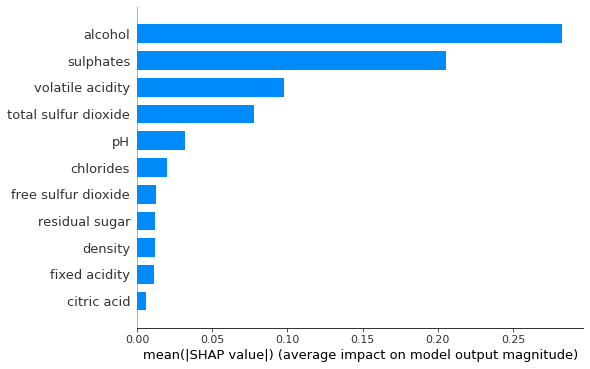

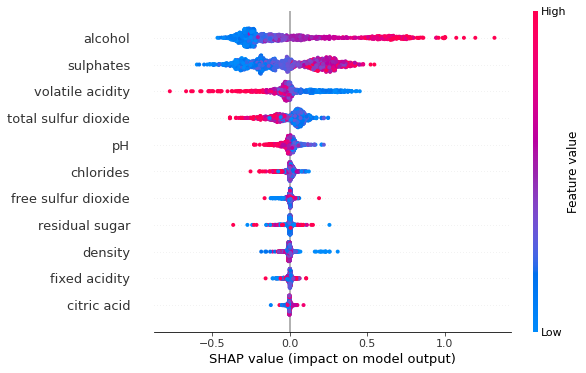

In [2]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv('winequality-red.csv') # Load the data

# Wartością mówiącą o wartości danej koalicji jest "quality" 
Y = df['quality']
X =  df[['fixed acidity',
         'volatile acidity', 
         'citric acid', 
         'residual sugar', 
         'chlorides', 
         'free sulfur dioxide', 
         'total sulfur dioxide', 
         'density','pH', 
         'sulphates', 
         'alcohol']]
# Podział zbioru na uczący i testowy
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")
shap.summary_plot(shap_values, X_train)

<p style='text-align: justify;'>
Powyższy wykresy wykazuje, że atrybut "alcohol" ma największą wartości shapleya w zbiorze atrybutów. Pozwala to rozpatrywać ten atrybut jako kluczowy pod względu wpływu na ocenę jakości wina. Dodatkowo, drugi wykres pozwala zauważyć, że "alcohol" często nagatywnie wpływa na wartość oceny jakości wina.
</p>

In [3]:
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(model.predict(X_output),2)

# Randomly pick some observations
random_picks = np.arange(1,5)
S = X_output.iloc[random_picks]

shap.initjs()

def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

shap_plot(3)

<p style='text-align: justify;'>
Powyżyszy wykres pozwala na analizę jednego konkretnego wina. Wykres prezentuje przesunięcię wartości końcowej jakości f(x) względem wartości bazowej (wartość średnia dla całego zbioru), oraz jak dane atrybuty wpłynęły na to przesunięcie.
</p>

### COCO

<p style='text-align: justify;'>
Microsoft COCO Captions jest rozległym zbiorem danych i serwerem ewaluacyjnym. Powstał w odpowiedzi na rozpowszechnianie się narzędzi do NLP, a szczególnie problemu oceny modeli. Zbiór danych COCO może posłużyć przykładowo jako narzędzie do segmentacji obiektów, rozpoznawania obiektów, tworzenia podpisów do obrazów i tokenizacji tekstu. Główną zaletą zbioru COCO jest możliwość odniesienia nowo powstałego modelu do innych przetestowanych metryk i przetestowanie modelu na szerokiej gamie dostępnych przykładów, które posiadają pełne i prawidłowe opracowanie różnych problemów z zakresu NLP.    
</p>

<b>Przykład </b>
<br>
Zbiór COCO posiada 1000 obrazów z wygnerowananym podpisem (zdanie kandydujące) i 5 zdań wzorco opisujących zawartość danej fotografii (zdania referencyjne). Dla każdego przykładu została policzona wartość metryki BLEU na trzy różne sposoby: 

* Własna implementacja wzorowana na działaniu pakietu NTLK
* Gotowy pakiet NLTK
* COCO Caption - kod ewaluacyjny dla MS COCO

Każdy z trzech sposobów został zaopatrzony w dane odpowiadające przyjmowanego formatowi i takie same wagi dla poszczególnych n-gramów obliczane zgodnie ze wzorem $1/N$, gdzie $N$ to liczba uwzględnianych n-gramów.
Następnie została policzona wartość bezwględna z różnicy pomiędzy:

* Własną implementacją, a gotowym pakietem NTLK
* Własną implementacją, a zbiorem COCO

Wyniki zostały przedstawione na histogramach z podziałem na kilka przypadków, a wartości poszczególnych metryk zostały przybliżone do wartości części tysięcznych.

In [2]:
# Przygotowanie zbioru COCO
from funkcje.Coco import *
(coco, cocoRes, cocoEval) = prepareCoco()

loading annotations into memory...
0:00:00.537498
creating index...
index created!
Loading and preparing results...     
DONE (t=0.03s)
creating index...
index created!
tokenization...


PTBTokenizer tokenized 61268 tokens at 210434.96 tokens per second.
PTBTokenizer tokenized 10892 tokens at 66939.73 tokens per second.


setting up scorers...
computing Bleu score...
{'testlen': 9893, 'reflen': 9855, 'guess': [9893, 8893, 7893, 6893], 'correct': [5732, 2510, 1043, 423]}
ratio:1.003856
Bleu_1: 0.579
Bleu_2: 0.404
Bleu_3: 0.279
Bleu_4: 0.191
computing METEOR score...
METEOR: 0.195
computing Rouge score...
ROUGE_L: 0.396
computing CIDEr score...
CIDEr: 0.600
computing SPICE score...


Parsing reference captions
Parsing test captions


SPICE evaluation took: 2.745 s
SPICE: 0.133


<b>Unigramy</b>
<br>
Unigramy (1-gramy) odpowiadają przyjęciu za wartość N liczby 1. Z tego powodu wagi przyjmują postać [1].

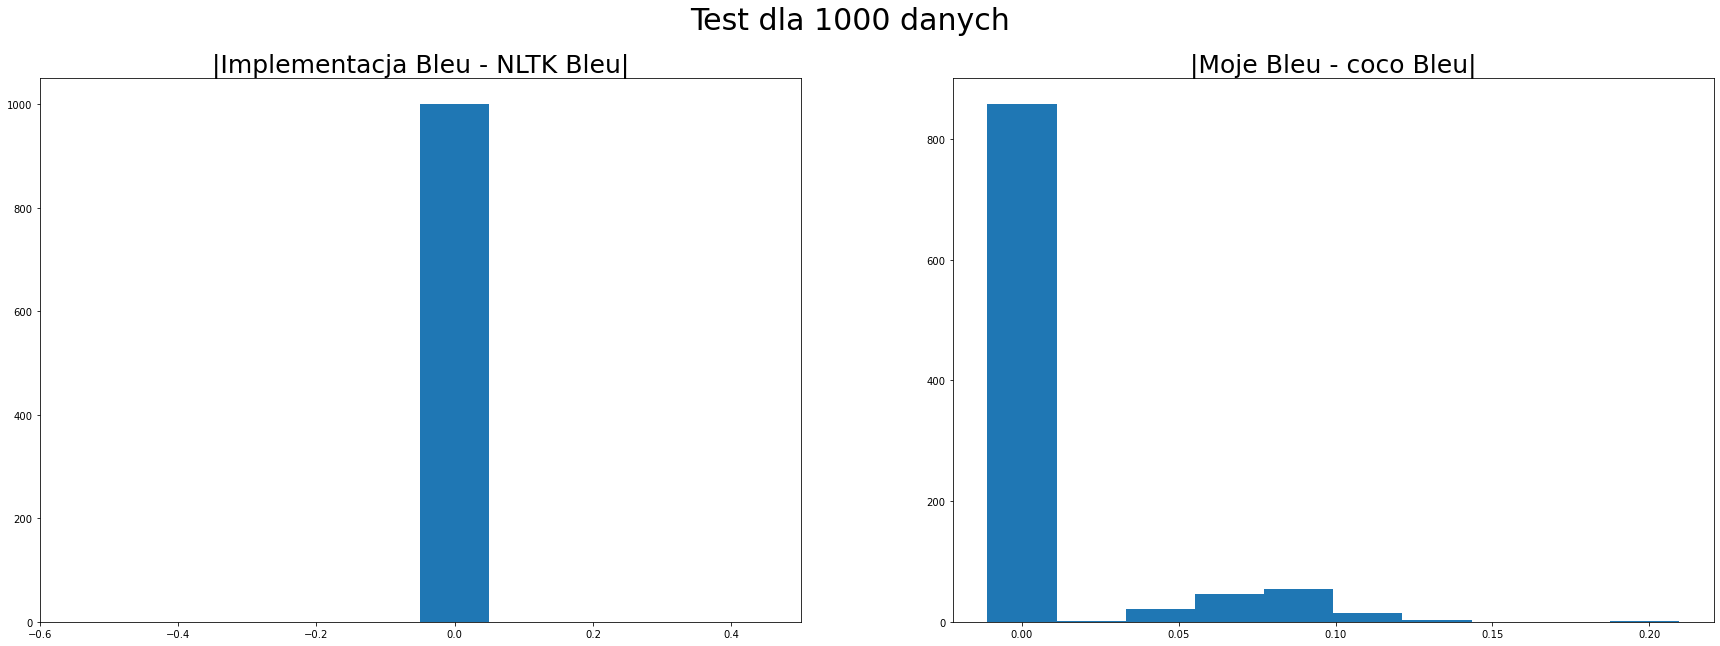

In [3]:
# Unigramy
from funkcje.Test import *
evals = cocoEval.evalImgs
test(coco, cocoRes, evals, [1])

<b>Bigramy</b>
<br>
Bigramy (2-gramy) odpowiadają przyjęciu za wartość N liczby 2. Z tego powodu wagi przyjmują postać [0.5, 0.5].

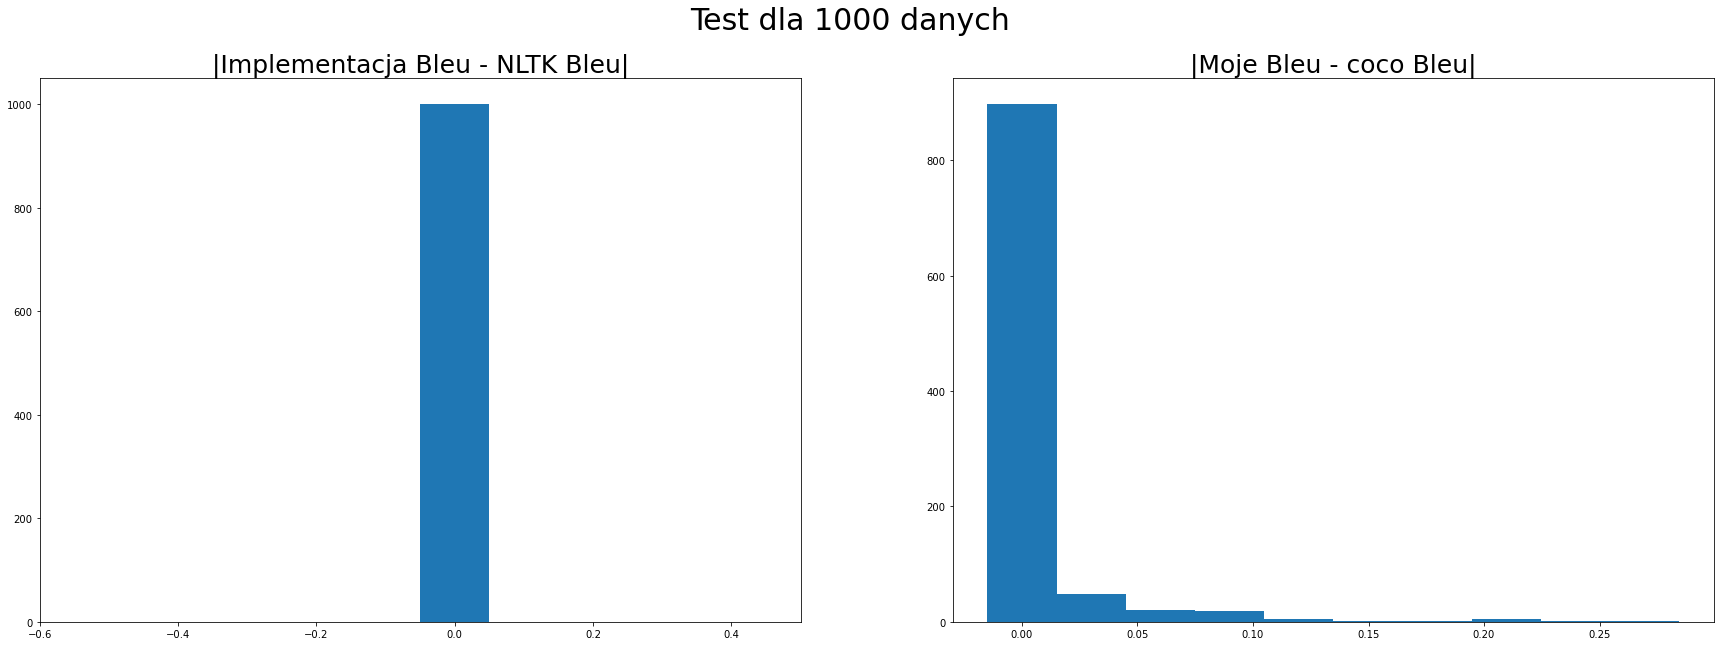

In [4]:
from funkcje.Test import *
evals = cocoEval.evalImgs
test(coco, cocoRes, evals, [0.5, 0.5])

<b>Trigramy</b>
<br>
Trigramy (3-gramy) odpowiadają przyjęciu za wartość N liczby 3. Z tego powodu wagi przyjmują postać [0.33, 0.33, 0.33].

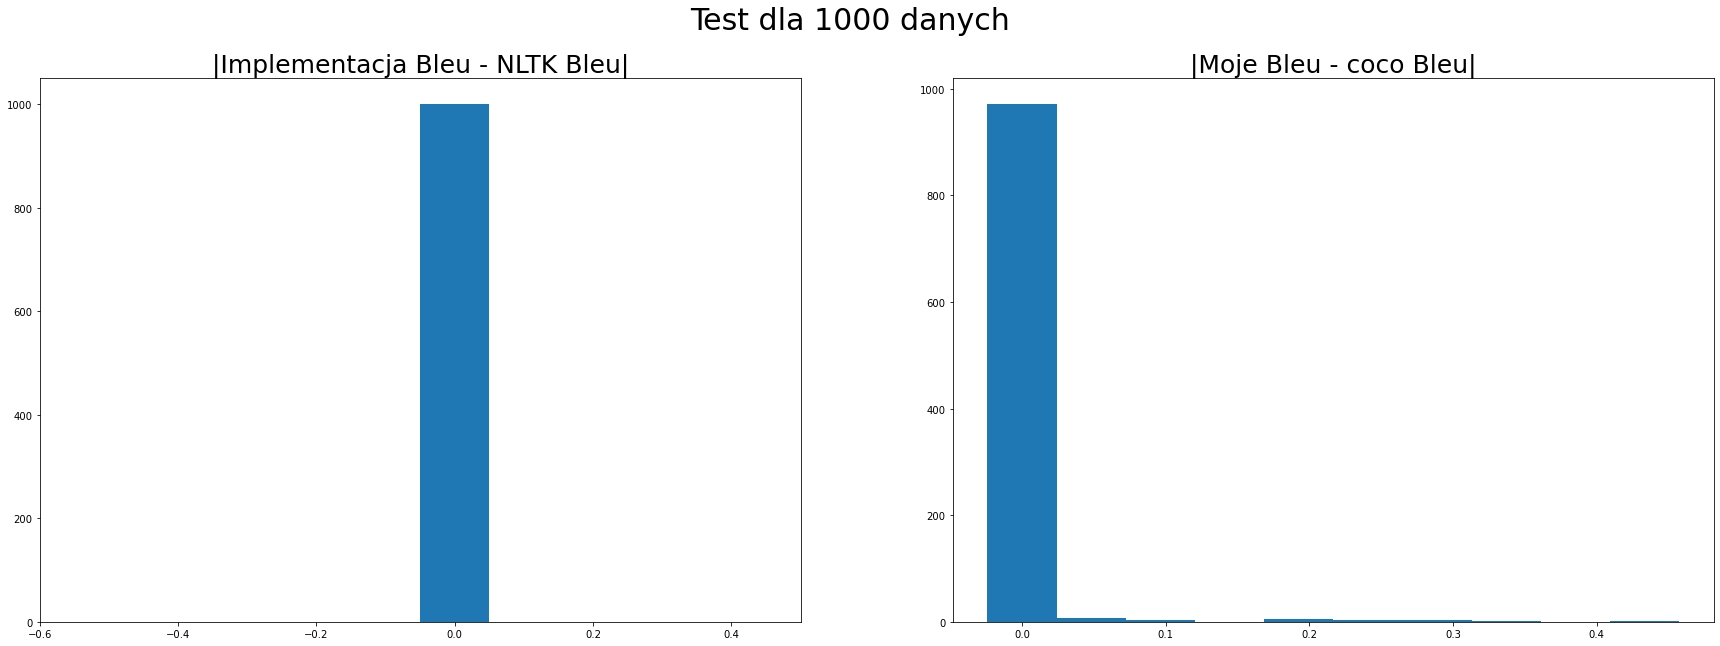

In [5]:
from funkcje.Test import *
evals = cocoEval.evalImgs
test(coco, cocoRes, evals, [0.33, 0.33, 0.33])

<b>4-gramy</b>
<br>
4-gramy odpowiadają przyjęciu za wartość N liczby 4. Z tego powodu wagi przyjmują postać [0.25, 0.25, 0.25, 0.25].

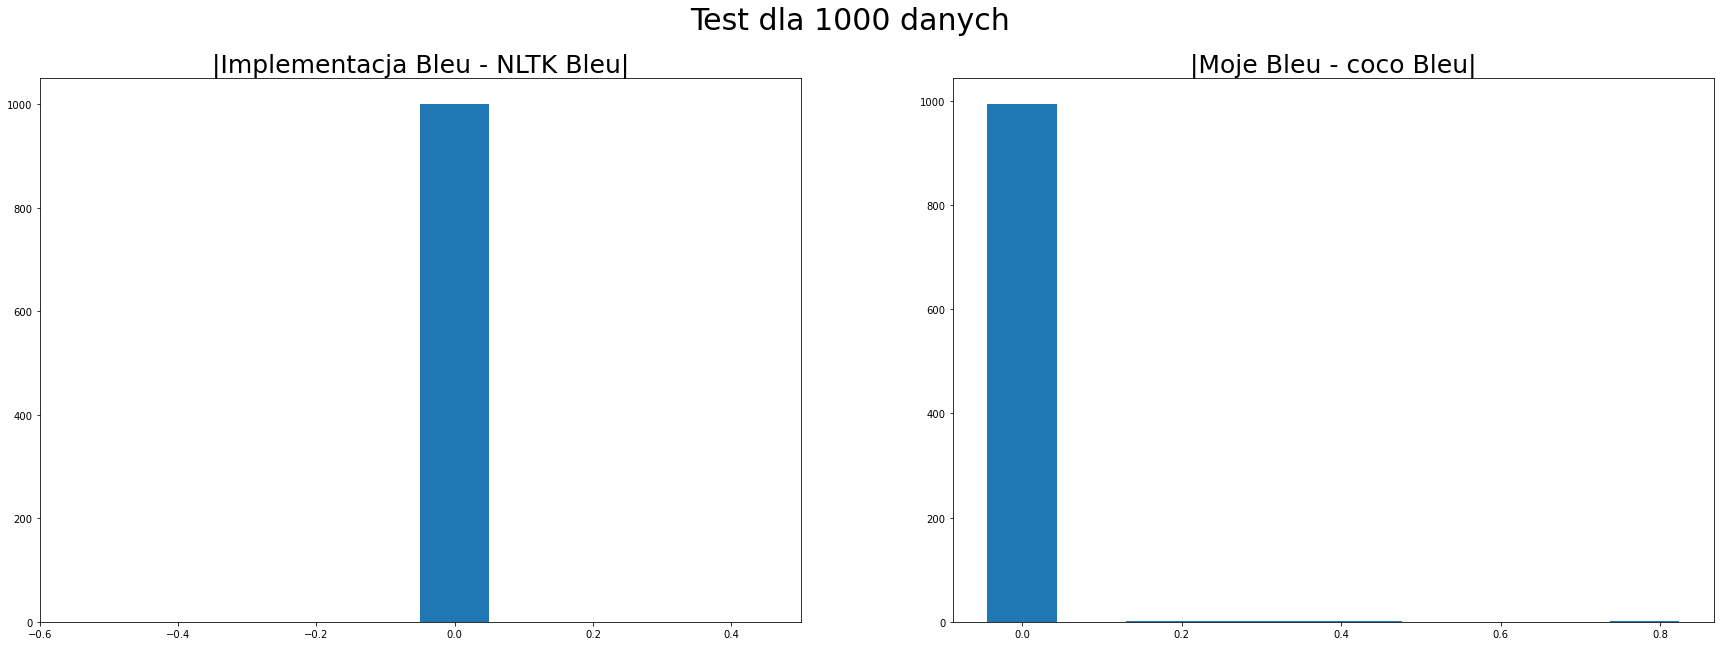

In [6]:
from funkcje.Test import *
evals = cocoEval.evalImgs
test(coco, cocoRes, evals, [0.25, 0.25, 0.25, 0.25])

<b>Wnioski</b>
<p style='text-align: justify;'>
    
* Wykresy prezentujące różnice pomiędzy wynikiem własnej implementacji, a gotowym pakietem NLTK pozwalają stwierdzić, że dla wszystkich (1000) przykładów nie występują praktycznie żadne różnice pomiędzy wynikami. Jest to konsekwencją prawdopodobnie tego, że sposób liczenia w testowanej implementacji był wzorowany na pakiecie NTLK i wiele mechanizmów zostało zaimplementowanych w sposób dający takie same rezultaty.
<br>
* W przypadku drugiej części wykresów dotyczących porównania własnej implementacji istnieją przykłady, które wskazują na istnienie istotnych różnic pomiędzy wynikami.
<br>
    
Przykład generujący różne wartości metryk:
<p>

In [2]:
from funkcje.Bleu import *
weights = [0.25, 0.25, 0.25, 0.25]

references = [
                'A vase filled with red and white flowers on top of a table.',
                'A tall vase with red and white tulips in water.',
                'Bunch of flowers sitting in vase filled with water and rocks on bottom',
                'A vase is filled with a bouquet of tulips. ',
                'A vase of flowers on a dining table.'
             ]
candidate =     'vase of flowers sitting on top of a table'

candidate = deletePunctuation(candidate)
references = [deletePunctuation(ref) for ref in references]

bleu = Bleu(weights, references, candidate)

bleu.showResult()

vase of flowers sitting on top of a table
['A vase filled with red and white flowers on top of a table', 'A tall vase with red and white tulips in water', 'Bunch of flowers sitting in vase filled with water and rocks on bottom', 'A vase is filled with a bouquet of tulips ', 'A vase of flowers on a dining table']
BLUE [4] = 1.000 exp( 0.25 ln( 8/9 ) + 0.25 ln( 7/8 ) + 0.25 ln( 5/7 ) + 0.25 ln( 2/6 ) ) = 0.6559965570884768


<p style='text-align: justify;'>
W przypadku tego przykładu wartość metryki jest zbyt mała dla własnej implementacji. Jest to spowodowane brakiem implementacji mechanizmu odpowiadającego za usuwanie znaków interpunkcyjnych. W konsekwencji słowo "table" nie jest prawidłowo dopasowywane do słów w referencjach.
</p>

Przykład generujący różne wartości metryk:

In [2]:
from funkcje.Bleu import *
weights = [0.25, 0.25, 0.25, 0.25]

references = [
                'A bathroom sink sitting under a large mirror.',
                'A bathroom with a vanity cabinet on the wrong wall',
                'A small beige bathroom with an additional medicine cabinet.',
                'A bathroom sink with a mirror and medicine cabinet.',
                'THERE IS A BATHROOM WITH A SINK AND A MIRROR'
            ]

# Tłumaczenie kandydujące
candidate =     'bathroom with a sink and a mirror'

bleu = Bleu(weights, references, candidate)

bleu.showAnalizedData()
bleu.showTable()
bleu.showResult()

['A bathroom sink sitting under a large mirror', 'A bathroom with a vanity cabinet on the wrong wall', 'A small beige bathroom with an additional medicine cabinet', 'A bathroom sink with a mirror and medicine cabinet', 'THERE IS A BATHROOM WITH A SINK AND A MIRROR']
Liczba rozpatrywanych n-gramów:                   4
Liczba tłumaczeń referencyjnych (wzorcowych):     5
Maksymalna długość wzorca:                        8
Maksymalna długość kandydata:                     7
Tłumaczenie kandydujące:                          ['bathroom', 'with', 'a', 'sink', 'and', 'a', 'mirror']
Tłumaczenie kandydujące bez powtórzeń:            ['bathroom', 'with', 'a', 'sink', 'and', 'mirror']


Lp   n-GRAM                                            Ref1      Ref2      Ref3      Ref4      Ref5      Max Ref   Count     Clip Count        Contribution
1)   bathroom                                          1         1         1         1         0         1         1         1                          6/7
2)  

<p style='text-align: justify;'>
W tym przypadku różnice wynikają z niedopasowania żadnego 4-gramu, co uniemożliwia matematyczne policzenie takiego równania. W konsekwencji przyjmowany jest wynik 0, ponieważ implementacja nie stosuje żadnych mechanizmów pozwalających na przybliżenie wyników w takich sytucjach.
</p>

<a id ="SOURCE"></a>
### Źródła
BLEU:
* https://towardsdatascience.com/bleu-bilingual-evaluation-understudy-2b4eab9bcfd1
* https://towardsdatascience.com/foundations-of-nlp-explained-bleu-score-and-wer-metrics-1a5ba06d812b
* http://docplayer.pl/14218168-Ewaluacja-systemow-tlumaczenia-automatycznego.html
</br>

METEOR:
* http://docplayer.pl/14218168-Ewaluacja-systemow-tlumaczenia-automatycznego.html
* https://www.jstor.org/stable/40783462
</br>

ROUGE:
* https://towardsdatascience.com/the-ultimate-performance-metric-in-nlp-111df6c64460
* https://en.wikipedia.org/wiki/Automatic_summarization
* https://en.wikipedia.org/wiki/ROUGE_(metric)
* https://pl.wikipedia.org/wiki/Najdłuższy_wspólny_podciąg
* https://towardsdatascience.com/to-rouge-or-not-to-rouge-6a5f3552ea45
* https://ryanong.co.uk/2020/01/23/day-18-summarisation-evaluation-metrics/

WMD:
* https://towardsdatascience.com/word-distance-between-word-embeddings-cc3e9cf1d632
* https://ermlab.com/blog/technicznie/doc2vec-wektorowa-reprezentacja-dokumentow/
* https://medium.com/@nihitextra/word-movers-distance-for-text-similarity-7492aeca71b0
* https://towardsai.net/p/nlp/word-movers-distance-wmd-explained-an-effective-method-of-document-classification-89cb258401f4
* https://www.youtube.com/watch?v=nX1g_wPSYOI
* https://code.google.com/archive/p/word2vec/

CIDEr:
* https://arxiv.org/pdf/1504.00325.pdf
* https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Vedantam_CIDEr_Consensus-Based_Image_2015_CVPR_paper.pdf

SPICE:
* https://panderson.me/spice/
* https://panderson.me/images/SPICE.pdf
* https://github.com/peteanderson80/SPICE
* https://www.cs.princeton.edu/courses/archive/spring18/cos598B/public/outline/Towards%20image%20captioning.pdf

COCO:
* https://github.com/tylin/coco-caption
* https://cocodataset.org/#home
* https://pl.wikipedia.org/wiki/N-gram
* https://arxiv.org/abs/1504.00325

Wartości Shapleya:
* https://towardsdatascience.com/the-shapley-value-for-ml-models-f1100bff78d1
* https://christophm.github.io/interpretable-ml-book/shapley.html
* https://pl.wikipedia.org/wiki/Wartość_Shapleya
* https://towarzystwo.edu.pl/assets/prace_matematyczne/Dmigacz.pdf
* http://shapleyvalue.com